In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import circulant

# Circulant matrices

## Unit translation matrix

Recall that an $n \times m$ matrix is called <b>Toeplitz</b> (after Otto Toeplitz) if it is constant along descending diagonals. An important special case of a Toeplitz matrix is a <b>circulant matrix</b>, which is a square $n \times n$ Toeplitz matrix such that the (constant) values along the $j$th and $(j-n)$th diagonals coincide. In this definition, the main diagonal is numbered zero, and the labels of the diagonals wrap around in a cyclic manner.

All circulant matrices arise from a single one: the unit translation. (Actually there are two possibilities: left translation, or right translation; one is the inverse of the other so this choice is irrelevant.) Sums, products, and inverses of circulant matrices are circulant; also, circulant matrices commute with each other. Let's construct a unit translation matrix; note carefully the positions of the non-zero entries relative to the main diagonal.

In [2]:
n = 7

def Circ(j,N):
    """ a circulant matrix whose first column is a euclidean basis vector """
    Id = np.eye(N)
    return circulant(Id[:,j%N])

C1 = Circ(1,n)  # one step

print('C1 = \n' + str(C1))

C1 = 
[[0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]]


Denote by $\mathbf{C}_j$ the $n \times n$ matrix returned by $\texttt{Circ(j,n)}$; this is a translation by $j$ steps, which is the same as taking one step $j$ times over, and therefore:

$$ \mathbf{C}_j = \mathbf{C}_1^j$$

Any circulant matrix $\mathbf{C}$ may be written uniquely as a polynomial of degree $n-1$ evaluated at $\mathbf{C}_j$, with coefficients being the entries of the first column of $\mathbf{C}$.

$$ \mathbf{C} = \sum_{k=0}^{n-1} a_k \mathbf{C}_k = \sum_{k=0}^{n-1} a_k \mathbf{C}_1^k = p \left( \mathbf{C}_1 \right)
$$

$$ p ( z ) = \sum_{k=0}^{n-1} a_k z^k \qquad \qquad a_k \in \mathbb{C}  $$

Let's see how this works.

In [3]:
def NewCirc(fc):
    """ circulant matrix with first column fc """
    Cn = np.zeros([fc.size,fc.size])
    for k in range(0,fc.size):
        Cn = Cn + fc[k]*Circ(k,fc.size)
    return Cn

v = np.linspace(0,n-1,n)
Cv = NewCirc(v)
print('Cv = \n' + str(Cv))

Cv = 
[[0. 6. 5. 4. 3. 2. 1.]
 [1. 0. 6. 5. 4. 3. 2.]
 [2. 1. 0. 6. 5. 4. 3.]
 [3. 2. 1. 0. 6. 5. 4.]
 [4. 3. 2. 1. 0. 6. 5.]
 [5. 4. 3. 2. 1. 0. 6.]
 [6. 5. 4. 3. 2. 1. 0.]]


### Fact

<i>If $\mathbf{A}$ is an $n \times n$ matrix such that
$$ \mathbf{A} \mathbf{C}_1 = \mathbf{C}_1 \mathbf{A} $$
then $\mathbf{A}$ is circulant.</i>

A matrix $\mathbf{A}$ that commutes with $\mathbf{C}_1$ is said to define a <b>linear time invariant</b> operator (LTI), because it is not affected at all by translation in time. (More precisely, translating the input of $\mathbf{A}$ is equivalent to applying $\mathbf{A}$ to the original signal and then translating the output of $\mathbf{A}$.) This fact, which was stated in the lecture notes, shows that any LTI matrix is circulant, and therefore may be written as a polynomial function of $\mathbf{C}_1$. Note that such a simple description is only possible because we restrict our attention to <b>discrete periodic signals</b>.

## DFT of circulant matrices

First we construct an $n \times n$ orthogonal DFT matrix by invoking the FFT algorithm $n$ times.

In [4]:
def MakeOrthDFTMat(N):
    return np.fft.fft(np.eye(N),norm='ortho');

F = MakeOrthDFTMat(n);
Finv = np.conjugate(F.T);

Next we'll create a random circulant matrix and check that it is diagonalized by the DFT matrix.

In [5]:
vrm = np.random.randn(n)
Crm = NewCirc(vrm)
print('Crm = \n' + str(np.round(Crm,decimals=2)) + '\n')

Drm = F.dot(Crm.dot(Finv))
print('real(Drm) = \n' + str(np.round(Drm,decimals=2).real) + '\n')

fftvrm = np.fft.fft(vrm)
print('real(fftvrm) = \n' + str(np.round(fftvrm.real,decimals=2)) + '\n')

Crm = 
[[-1.94  0.81  2.29  0.69 -0.68  0.22 -2.17]
 [-2.17 -1.94  0.81  2.29  0.69 -0.68  0.22]
 [ 0.22 -2.17 -1.94  0.81  2.29  0.69 -0.68]
 [-0.68  0.22 -2.17 -1.94  0.81  2.29  0.69]
 [ 0.69 -0.68  0.22 -2.17 -1.94  0.81  2.29]
 [ 2.29  0.69 -0.68  0.22 -2.17 -1.94  0.81]
 [ 0.81  2.29  0.69 -0.68  0.22 -2.17 -1.94]]

real(Drm) = 
[[-0.78  0.   -0.   -0.   -0.   -0.    0.  ]
 [ 0.   -3.36  0.   -0.    0.    0.   -0.  ]
 [-0.    0.   -3.9   0.    0.   -0.    0.  ]
 [-0.   -0.    0.    0.84  0.    0.    0.  ]
 [-0.    0.    0.    0.    0.84  0.   -0.  ]
 [-0.    0.   -0.    0.    0.   -3.9   0.  ]
 [ 0.   -0.    0.    0.   -0.    0.   -3.36]]

real(fftvrm) = 
[-0.78 -3.36 -3.9   0.84  0.84 -3.9  -3.36]



Observe that the vector of eigenvalues of the circulant matrix $\mathbf{C}$ is the same as the DFT of the first column of $\mathbf{C}$.

<b>Exercise:</b> Modify the code above to check that the imaginary parts (rather than the real parts) coincide as well, then select <i>Restart &amp; Run All</i> from the <i>Kernel</i> menu.

## Application 1: noise removal

Consider a signal defined by the following function:
$$ f ( t ) = \exp \left( \sin^3 t \right) $$
Unfortunately, due to experimental limitations, the signal was corrupted by some noise.

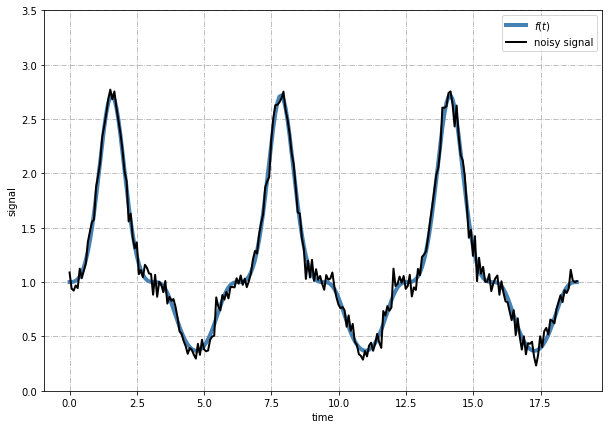

In [6]:
K = 250
epsilon = 0.075
numcopies = 3
tt = np.linspace(0,numcopies*2*np.pi,K)
ff = np.exp(np.power(np.sin(tt),3)) + epsilon*np.random.randn(K)
gg = np.exp(np.power(np.sin(tt),3))

plt.figure(figsize=(10,7));
ax = plt.subplot(111)
plt.plot(tt,gg,color='steelblue',linewidth='4',label=r'$f(t)$')
plt.plot(tt,ff,color='black',linewidth='2',label='noisy signal')
plt.xlabel('time')
plt.ylabel('signal')
ax.set_ylim(0,3.5)
ax.grid(linestyle='-.')
plt.legend(loc='upper right')
plt.show()

The underlying signal looks like it may be very smooth; we can verify this using the DFT.

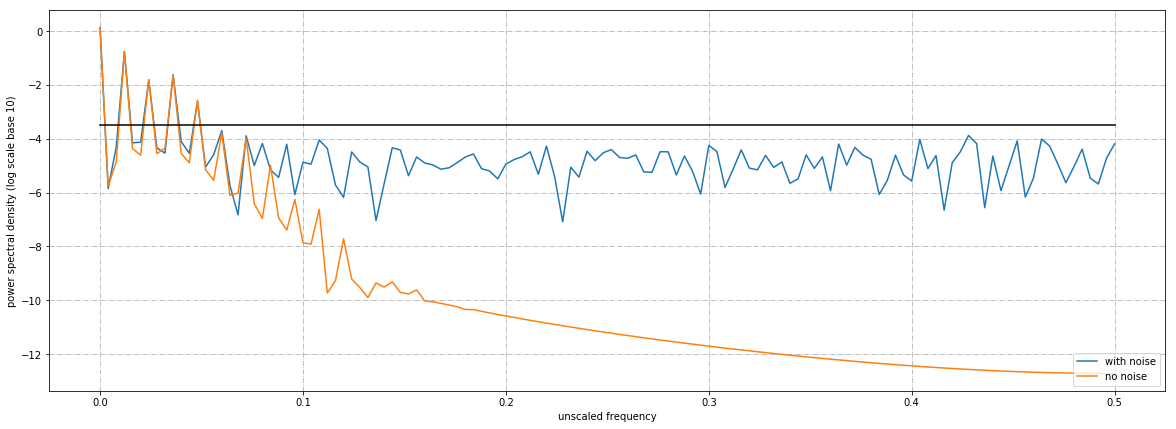

In [7]:
FTff = np.fft.rfft(ff)/K
FTgg = np.fft.rfft(gg)/K
logSDFTff = np.log10(np.square(np.abs(FTff)))
logSDFTgg = np.log10(np.square(np.abs(FTgg)))
freqs = np.fft.rfftfreq(K)
plt.figure(figsize=(20,7))
ax = plt.subplot(111);
plt.plot(freqs,logSDFTff,label='with noise');
plt.plot(freqs,logSDFTgg,label='no noise');
plt.plot(freqs,0*logSDFTff-3.5,color='black');
ax.grid(linestyle='-.')
plt.legend(loc='lower right')
plt.xlabel('unscaled frequency')
plt.ylabel('power spectral density (log scale base 10)')
plt.show();

Compare to the true function $f(t)$, the noisy signal contains high-frequency oscillations with a flat spectral density, i.e. white noise. We are going to construct a filter, represented in the time domain by a circulant matrix (or equivalently, a circular convolution), to remove this noise. The effect of this filter will be to remove entries from the DFT of the noisy signal corresponding to frequencies where the power spectral density is under a reasonable threshold, say $10^{-3.5}$ based on the above plot. <b>Note carefully that the filtering operation is performed in the time domain, not the Fourier domain.</b>

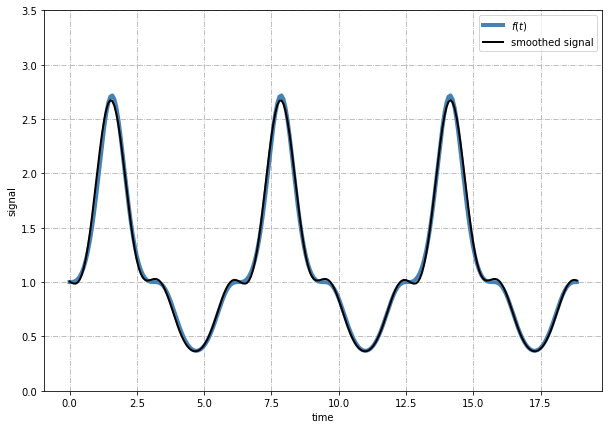

In [8]:
logthres = -3.5

ffmask = np.ones(FTff.shape)
ffmask[logSDFTff < logthres] = 0

Cir = NewCirc(np.fft.irfft(ffmask))  # circulant matrix
Cir /= np.sum(Cir[:,1])  # normalization

ff2 = Cir.dot(ff) # circular convolution in the time domain

plt.figure(figsize=(10,7));
ax = plt.subplot(111)
plt.plot(tt,gg,color='steelblue',linewidth='4',label=r'$f(t)$')
plt.plot(tt,ff2,color='black',linewidth='2',label='smoothed signal')
plt.xlabel('time')
plt.ylabel('signal')
ax.set_ylim(0,3.5)
ax.grid(linestyle='-.')
plt.legend(loc='upper right')
plt.show()

The smoothed signal is much less noisy than the original while retaining the key features of $f(t)$, but this is only because we were able to optimize the filtering threshold using our knowledge of the underlying function $f(t)$. Moreover, if we did not already know the spectral density of the noise (i.e. flat / white noise), it could have been difficult to determine the correct choice of cut-off frequency. If you re-run the entire notebook a few times, you may notice that the peaks of the smoothed signal tend to fall slightly below those of $f(t)$; this is typical for convolutions since they average out the oscillations.

<b>Exercise:</b> Choose different values of the threshold in the above code (remember the logarithmic scaling!); you will need to select <i>Restart &amp; Run All</i> from the <i>Kernel</i> menu. Try $\texttt{logthres} = 0.0, -1.0, -2.0, -3.0, -4.0, -5.0$.

<b>Exercise:</b> Reset the threshold to $\texttt{logthres} = -3.5$ and now try filtering out the function $f(t)$, which is the vector $\texttt{gg}$ in the above code, using the circulant matrix $\texttt{Cir}$. Notice that when the filter is applied to the signal <i>and</i> the underlying function, the two curves appear almost the same; in particular, the peaks should appear to agree if they didn't before.

## Application 2: differentiation

Suppose $f : \mathbb{R} \rightarrow \mathbb{R}$ is a smooth real-valued function, and denote the linear operators $D, \tau_a$ ($a \in \mathbb{R}$) as follows:

$$ \left( D f \right) \left( x \right) = f^\prime \left( x \right) $$

$$ \left( \tau_a f \right) \left( x \right) = f \left( x + a \right) $$

Then we can deduce from the chain rule of calculus that

$$ D \circ \tau_a = \tau_a \circ D $$

In other words, $D$ is invariant under arbitrary translations. Therefore, it is not surprising that discretized versions of $D$ in the <i>periodic</i> setting may be realized as circulant matrices.

One possible way to define a discrete derivative is to subtract $f$ from a translation of $f$; this is not the most accurate approximation possible, but it can be computed very quickly (i.e., avoiding matrix-vector products).

One can distinguish between the <i>forward finite difference</i>, which is $\mathtt{Circ(-1,J)}$ up to normalization, and the <i>backward finite difference</i>, which is $\mathtt{Circ(1,J)}$. Let's call them $D_+$ and $D_-$, respectively. Either one can be used to approximate $f^\prime$, but the result will be shifted slightly to the right or left depending on our choice. A convenient way to eliminate this shift (and improve the numerical precision somewhat) is to use the <i>centered finite difference</i>, which is just the average of forward and backward differences:

$$ D_c = \frac{ D_+ + D_- }{2} $$

We will use centered differencing in this module to avoid shifting the plot to the left or right. You should experiment with different choices to gain intuition.

Let's use finite differences to compute the derivative of the following function:

$$ f ( t ) = \exp \left( \sin^3 t \right)  $$

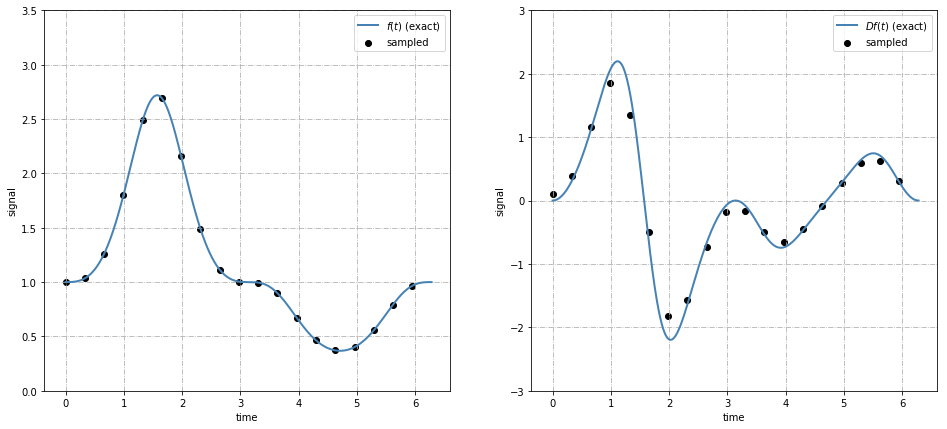

In [9]:
J = 20

J -= (J+1)%2   # makes it odd
tt = np.linspace(0,2*np.pi,num=J,endpoint=False)
ttr = np.linspace(0,2*np.pi,100*J)
ff = np.exp(np.power(np.sin(tt),3))
ffr = np.exp(np.power(np.sin(ttr),3))
hh = np.exp(np.power(np.sin(ttr),3)) * \
    (3*np.power(np.sin(ttr),2)) * np.cos(ttr)
uu = (3*np.exp(np.power(np.sin(ttr),3)))*np.sin(ttr) * \
    ( 3*np.power(np.sin(ttr),3)*np.power(np.cos(ttr),2) + \
    2*np.power(np.cos(ttr),2) - np.power(np.sin(ttr),2))

D = (Circ(-1,J)-Circ(1,J)) * 0.5 * (J/(2*np.pi)) 
                            # circulant centered finite difference matrix
Dff = D.dot(ff) 

plt.figure(figsize=(16,7));
ax = plt.subplot(121);
plt.plot(ttr,ffr,color='steelblue',linewidth='2',label=r'$f(t)$ (exact)');
plt.scatter(tt,ff,color='black',label=r'sampled');
ax.set_ylim(0,3.5)
plt.xlabel('time')
plt.ylabel('signal')
ax.grid(linestyle='-.')
plt.legend(loc='upper right')
ax = plt.subplot(122);
plt.plot(ttr,hh,color='steelblue',linewidth='2',label=r'$ D f  (t)$ (exact)');
plt.scatter(tt,Dff,color='black',label=r'sampled');
ax.set_ylim(-3,3)
plt.xlabel('time')
plt.ylabel('signal')
ax.grid(linestyle='-.')
plt.legend(loc='upper right')
plt.show();

The second derivative $D^2 f$ can likewise be computed by <i>squaring</i> the first-order finite difference matrix.

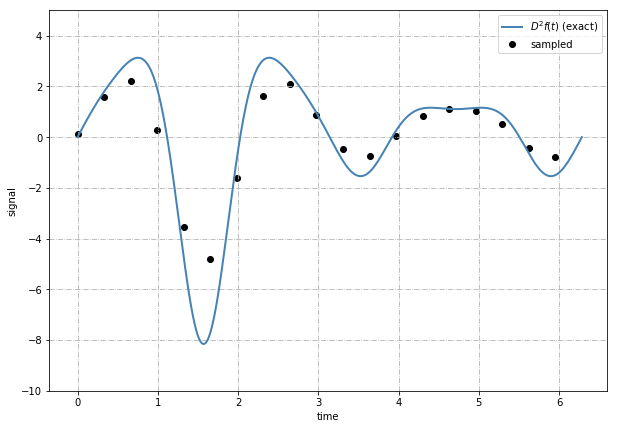

In [10]:
D2 = D.dot(D);
D2ff = D2.dot(ff);

plt.figure(figsize=(10,7));
ax = plt.subplot(111);
plt.plot(ttr,uu,color='steelblue',linewidth='2',label=r'$ D^2 f  (t)$ (exact)');
plt.scatter(tt,D2ff,color='black',label=r'sampled');
ax.set_ylim(-10,5)
plt.xlabel('time')
plt.ylabel('signal')
ax.grid(linestyle='-.')
plt.legend(loc='upper right')
plt.show();

We will get a better result (theoretically by a factor of $4$) from multiplying $D_+ D_-$ rather than squaring $D_c$:

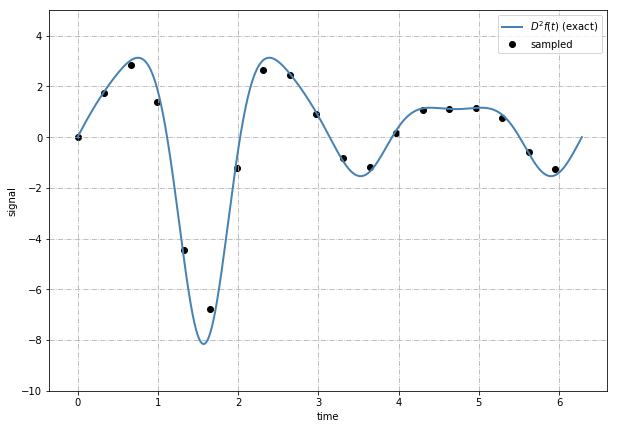

In [11]:
Dp = (Circ(-1,J)-Circ(0,J))  * (J/(2*np.pi)) 
Dm = (Circ(0,J)-Circ(1,J))  * (J/(2*np.pi)) 
D2pm = Dp.dot(Dm)
D2ffpm = D2pm.dot(ff);

plt.figure(figsize=(10,7));
ax = plt.subplot(111);
plt.plot(ttr,uu,color='steelblue',linewidth='2',label=r'$ D^2 f  (t)$ (exact)');
plt.scatter(tt,D2ffpm,color='black',label=r'sampled');
ax.set_ylim(-10,5)
plt.xlabel('time')
plt.ylabel('signal')
ax.grid(linestyle='-.')
plt.legend(loc='upper right')
plt.show();

Either way the error is still subtantial due to the coarseness of the grid.

## Application 3: spectral differentiation

Remember that the derivative of $e^x$ is $e^x$. For complex exponentials, this translates to

$$ \frac{d}{dt} e^{i \omega t} = i \omega e^{i \omega t} $$

In other words, $e^{i \omega t}$ may be thought of as an eigenvector of $ - i \frac{d}{dt}$ with eigenvalue $\omega$. Roughly speaking, the Fourier transform diagonalizes differentiation.

Now recall that the DFT diagonalizes circulant matrices. Let's see what happens when we use the DFT to diagonalize the first-order finite difference matrix from the previous application. Remember, it is enough to apply FFT to the first column.

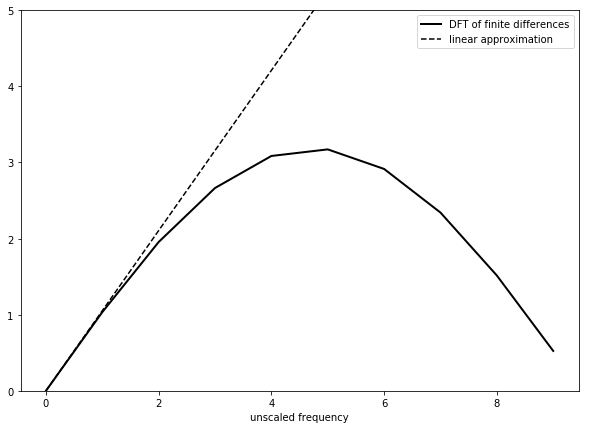

In [12]:
ww = np.real((-1)*1j*np.fft.rfft(D[:,0]));
wwlinear = np.linspace(0,ww.size-1,ww.size);

plt.figure(figsize=(10,7));
ax = plt.subplot(111);
plt.plot(ww*(20/J),color='black',linewidth='2',label='DFT of finite differences');
plt.plot(wwlinear*(20/J),color='black',linestyle='--',label='linear approximation');
ax.set_ylim(0,5);
plt.xlabel('unscaled frequency');
plt.legend(loc='upper right')
plt.show();

In the above plot, the solid black curve represents the DFT of the first-order finite difference matrix; the linear approximation at the zero frequency is dotted. <b>Clearly, the DFT of the first-order finite difference matrix is <i>not</i> linear!</b>

We can fix this easily enough, by taking the <i>inverse</i> FFT of the linear approximant; in that case, the resulting <b>circulant</b> matrix is known as a <i>spectral differentiation formula</i>. This formula computes the derivative <i>exactly</i> for trigonometric polynomials of order less than $\approx \frac{1}{2} n$, on a <b>periodic</b> linear grid of $n$ equispaced points. Of course, we can no longer expect the time-domain version to be sparse! This is one of the great disadvantages of spectral or high-order methods (the other being that they are often hard to use in irregular geometries).

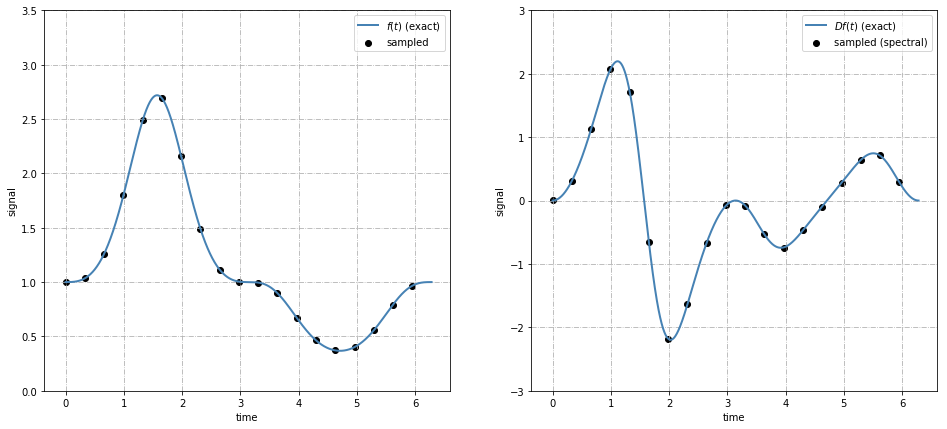

In [13]:
Dspec = NewCirc( np.fft.irfft( 1j*wwlinear, J ));

Dffspec = Dspec.dot(ff);

plt.figure(figsize=(16,7));
ax = plt.subplot(121);
plt.plot(ttr,ffr,color='steelblue',linewidth='2',label=r'$f(t)$ (exact)');
plt.scatter(tt,ff,color='black',label=r'sampled');
ax.set_ylim(0,3.5)
plt.xlabel('time')
plt.ylabel('signal')
ax.grid(linestyle='-.')
plt.legend(loc='upper right')
ax = plt.subplot(122);
plt.plot(ttr,hh,color='steelblue',linewidth='2',label=r'$ D f  (t)$ (exact)');
plt.scatter(tt,Dffspec,color='black',label=r'sampled (spectral)');
ax.set_ylim(-3,3)
plt.xlabel('time')
plt.ylabel('signal')
ax.grid(linestyle='-.')
plt.legend(loc='upper right')
plt.show();

We can already see that the spectral differentiation formula is more accurate for the first derivative. However, a more dramatic improvement is observed when we attempt to compute the <i>second</i> derivative:

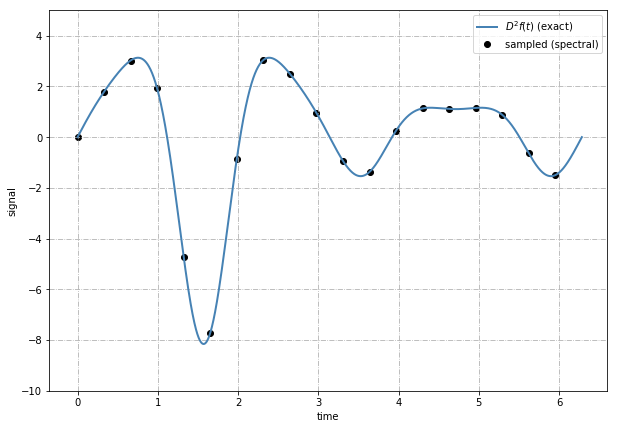

In [14]:
D2spec = Dspec.dot(Dspec);
D2ffspec = D2spec.dot(ff);

plt.figure(figsize=(10,7));
ax = plt.subplot(111);
plt.plot(ttr,uu,color='steelblue',linewidth='2',label=r'$ D^2 f  (t)$ (exact)');
plt.scatter(tt,D2ffspec,color='black',label=r'sampled (spectral)');
ax.set_ylim(-10,5)
plt.xlabel('time')
plt.ylabel('signal')
ax.grid(linestyle='-.')
plt.legend(loc='upper right')
plt.show();

You could use Taylor's theorem to compute (by hand) a finite difference formula which would give comparable accuracy on this course grid, but your hand would be sore by the end! The use of DFT makes the process very easy.

Finally we plot the (time domain) spectral vs. finite difference differentiation matrices discussed above. Observe that the finite difference formula we have used may be efficiently computed in the time domain using sparsity. On the other hand, the spectral differentiation matrix is <i>dense</i> in the time domain and would penalize us an <b>extra factor</b> of $\mathcal{O} (n)$ due to a (true) matrix-vector multiply. On the other hand, by using FFT to move to the Fourier domain, the spectral method is just as fast to use as the finite difference method on the same grid, apart from a factor of $\log n$.

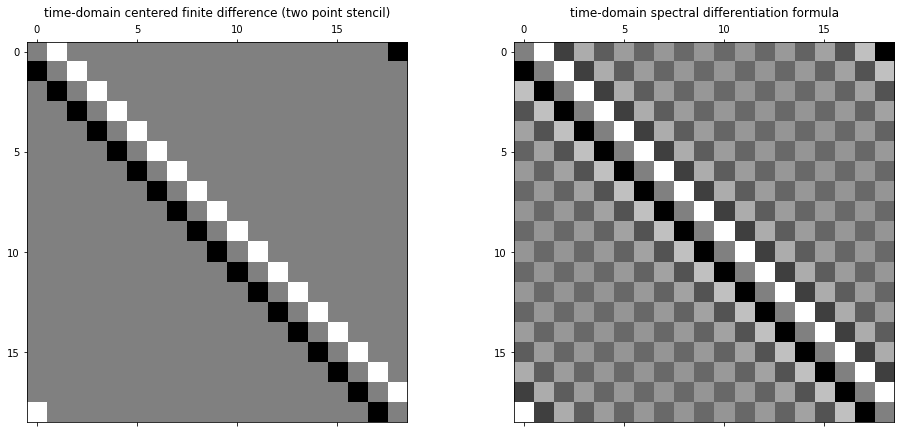

In [15]:
plt.figure(figsize=(16,7));
ax = plt.subplot(121);
plt.title('time-domain centered finite difference (two point stencil)')
plt.matshow(D,fignum=False,cmap='gray');
ax = plt.subplot(122);
plt.title('time-domain spectral differentiation formula')
plt.matshow(Dspec,fignum=False,cmap='gray');
plt.show();

## Application 4: matrix exponential

We can use FFT to efficiently compute the exponential of a circulant matrix. Recall that for a square matrix $\mathbf{A}$, the matrix exponential $\exp \mathbf{A}$ is defined by the following convergent power series:

$$ \exp \mathbf{A} = \sum_{k=0}^\infty \frac{1}{k!} \mathbf{A}^k $$

The matrix exponential is important for the solution of systems of ODEs.

If $\mathbf{A} = \mathbf{X} \mathbf{\Lambda} \mathbf{X}^{-1}$ for invertible $\mathbf{X}$ and diagonal $\mathbf{\Lambda}$, then by direct computation it follows that

$$ \mathbf{A}^k = \mathbf{X} \mathbf{\Lambda}^k \mathbf{X}^{-1} $$

Then by direct summation,

$$ \exp \mathbf{A} = \mathbf{X} \left( \exp \mathbf{\Lambda} \right) \mathbf{X}^{-1} $$

Since the FFT diagonalizes circulant matrices, we can quickly compute $\exp \mathbf{A}$ if $\mathbf{A}$ is circulant.

Let's compute

$$ \exp \left( h \mathbf{D}_{\textrm{spec}} \right) $$

where $\mathbf{D}_{\textrm{spec}}$ is the spectral differentiation matrix from the previous application, and $h$ is the step size of the grid. We will see that this matrix looks an awful lot like a unit translation matrix $\mathbf{C}_{-1}$; hence, we will plot the element-wise residual alongside.

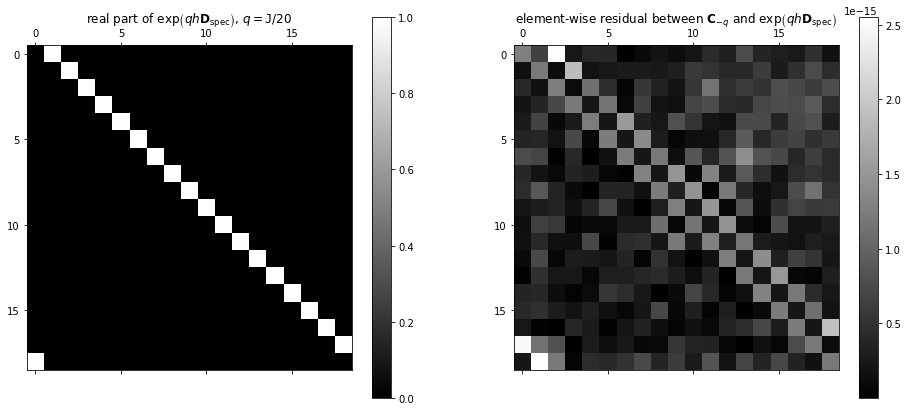

In [16]:
h = 2*np.pi/J
q = np.int(0.1+np.round(J/20))
FF = MakeOrthDFTMat(J);
FFinv = np.conjugate(FF.T);

Lambda = FF.dot(Dspec.dot(FFinv))
expLambda = np.exp(h*q*Lambda) * np.eye(J)
expDspec = FFinv.dot(expLambda.dot(FF))
plt.figure(figsize=(16,7));
ax = plt.subplot(121);
plt.title(r'real part of $\exp \left( q h \mathbf{D}_{\mathrm{spec}} \right)$, $q = \mathtt{J} / 20$');
plt.matshow(expDspec.real,fignum=False,cmap='gray');
plt.colorbar();
ax = plt.subplot(122);
plt.title(r'element-wise residual between $\mathbf{C}_{-q}$ and ' + \
          r'$\exp \left( q h \mathbf{D}_{\mathrm{spec}} \right)$');
plt.matshow(np.abs(Circ((-1)*q,J)-expDspec),fignum=False,cmap='gray')
plt.colorbar();

<b>Exercise:</b> Find the line where the number $\texttt{J}$ is defined in the code, and try $\texttt{J} = 40, 60, 80$ instead of the default $\texttt{J} = 20$; you will need to select <i>Restart &amp; Run All</i> from the <i>Kernel</i> menu each time. How does the residual between $\exp \left( q h \mathbf{D}_{\textrm{spec}} \right)$ and $\mathbf{C}_{-q}$ vary as $\texttt{J}$ increases? Note that $\texttt{ q = J/20 }$ to ensure a meaningful comparison.

From the above residuals plot and the exercise, we might conjecture that

$$ \exp \left( a D \right) = \tau_{a} $$

where $D$ is the derivative operator (defined as a limit) and $\tau_a$ is the translation by distance $a$. Note that we have not really defined what the exponential of a general linear operator is, nor does this concept always make sense. Nevertheless, in a precise sense which we will not state, the above formula is actually true! We can check it formally using the Taylor series if $\left| a \right|$ is small and $f$ has a convergent power series expansion near $t_0$:

\begin{equation}
\begin{aligned}
\left( e^{a D} f \right) \left( t_0 \right) = \sum_{k=0}^\infty
\frac{1}{k!} \left[ \left( a D \right)^k f \right] (t_0) =
\sum_{k=0}^\infty \frac{1}{k!} a^k \left[ D^k f \right] (t_0) =
\sum_{k=0}^\infty \frac{1}{k!} a^k f^{(k)} (t_0) = f \left( t_0 + a \right)
\end{aligned}
\end{equation}